In [39]:
import pandas as pd
import sys
sys.path.append('./src/')
import doc_utils
import feature_utils
import imp
imp.reload(feature_utils)  

<module 'feature_utils' from './src/feature_utils.py'>

In [40]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer, TfidfTransformer

tdidf = TfidfVectorizer(min_df=4,norm='l1')

In [41]:
block_db = pd.read_csv("block_db.csv")
block_db

,text,is_nar,doc_idx,par_idx,par_type,block_type,nar_idx,one_before_is_nar,two_before_is_nar
0,CLIENT,0.000000,0.000000,0.000000,no_mark,not_nar,0.000000,0.000000,0.000000
1,THERAPIST,0.000000,0.000000,1.000000,no_mark,not_nar,0.000000,0.000000,0.000000
2,התחל,0.000000,0.000000,2.000000,no_mark,not_nar,0.000000,0.000000,0.000000
3,שפהעב,0.000000,0.000000,3.000000,no_mark,not_nar,0.000000,0.000000,0.000000
4,משתתפים,0.000000,0.000000,4.000000,no_mark,not_nar,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1356,ככה כמה דקות אה לא לא לא בסדר,0.000000,5.000000,269.000000,therapist,not_nar,0.000000,0.000000,0.000000
1357,לא לא לא בסדר יש לך את הדקות בשביל ה,0.000000,5.000000,270.000000,client,not_nar,0.000000,0.000000,0.000000
1358,יש לך את הדקות בשביל ה,0.000000,5.000000,271.000000,therapist,not_nar,0.000000,0.000000,0.000000
1359,את הזה השאלון,0.000000,5.000000,272.000000,client,not_nar,0.000000,0.000000,0.000000


In [49]:
cl_th_db = block_db.query("par_type in ['client','therapist']")

## Process with TFidf and run SGDClassifier

Run model for par_type == 'client'
total data len: 622
len train: 466, len test: 156
['10', '14', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אומרים', 'אומרת', 'אוקיי', 'אחי', 'איזשהו', 'איזשהי', 'איתה', 'איתי', 'איתך', 'איתם', 'אלי', 'אליו']
['יחסים', 'יחסית', 'יכולים', 'יכולתי', 'ילד', 'ימים', 'יצא', 'יקרה', 'ישבתי', 'ישר', 'כאילו', 'כזאת', 'כיף', 'ככ', 'כללי', 'כשאני', 'לאיזה', 'לבוא', 'לגמרי', 'להבין']
['10', 'אמרתי', 'בעבודה', 'הגעתי', 'וואי', 'כאילו', 'לצאת', 'ממנה', 'סוג', 'רציתי']


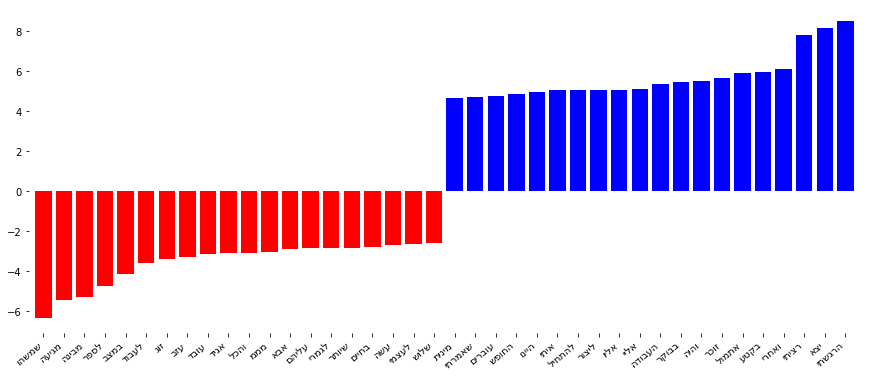

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67        84
         1.0       0.61      0.58      0.60        72

    accuracy                           0.63       156
   macro avg       0.63      0.63      0.63       156
weighted avg       0.63      0.63      0.63       156

Run model for par_type in ['client','therapist']
total data len: 1251
len train: 938, len test: 313
['10', '14', 'xxx', 'אבא', 'אגיד', 'אה', 'אהה', 'אהיה', 'אומרים', 'אומרת', 'אוקי', 'אוקיי', 'איזשהו', 'איזשהי', 'איכשהו', 'אישי', 'איתה', 'איתי', 'איתך', 'איתם']
['ילד', 'ילדה', 'יצא', 'יצר', 'יקרה', 'ישבתי', 'ישירות', 'ישר', 'כאילו', 'כושר', 'כזאת', 'כיף', 'ככ', 'כלומר', 'כלל', 'כללי', 'כשאני', 'כשאתה', 'כשהוא', 'לאו']
['10', 'באמצע', 'בשבת', 'הנה', 'וואלה', 'כיף', 'לקחתי', 'מסוים', 'עזב', 'שבו']


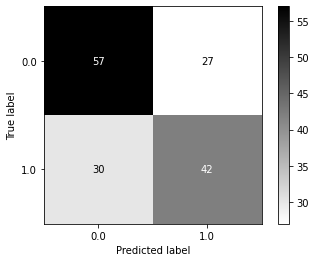

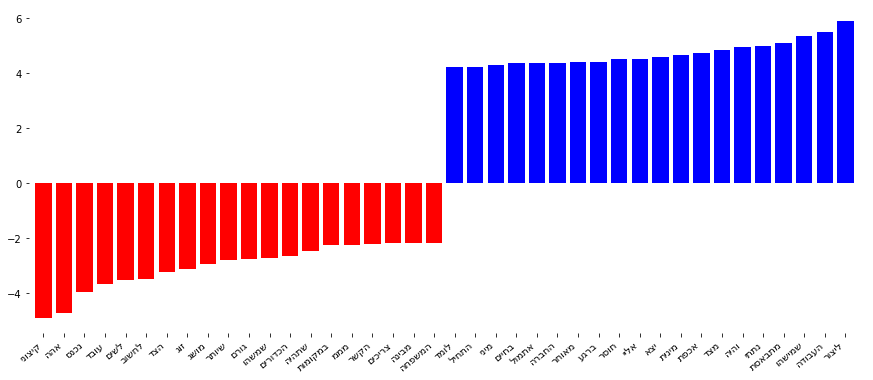

              precision    recall  f1-score   support

         0.0       0.65      0.77      0.71       172
         1.0       0.64      0.50      0.56       141

    accuracy                           0.65       313
   macro avg       0.65      0.64      0.63       313
weighted avg       0.65      0.65      0.64       313



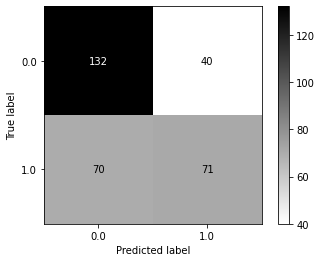

In [48]:
queries = ["par_type == 'client'",
            "par_type in ['client','therapist']"]
for q in queries:
    print("Run model for {}".format(q))
    feature_utils.run_model(block_db.query(q))

## Embedded - fasttext fro Hebrew

In [62]:
import fasttext.util
ft = fasttext.load_model('./external_src/cc.he.300.bin.gz')

In [65]:
ft.get_nearest_neighbors('מטפל')

[(0.7185356616973877, 'ומטפל'),
 (0.7173291444778442, 'שמטפל'),
 (0.6891626119613647, 'מטפל-'),
 (0.6731259822845459, 'המטפל'),
 (0.6602925658226013, 'נפש.מטפל'),
 (0.6589658856391907, 'כשמטפל'),
 (0.6411737203598022, 'מטפלת'),
 (0.635364830493927, 'במטפל'),
 (0.6296566128730774, 'וכמטפל'),
 (0.6236903667449951, 'ממטפל')]

In [ ]:
ft.